In [1]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
# start_date = '2021-12-7'
# end_date = '2022-06-30'
# Stock = pdr.data.DataReader('0050.TW', 'yahoo', start=start_date, end=end_date)
# mpf.plot(Stock[Stock.columns[:-1]], type='candle')

0.9454189186940256
0.1433597251274155


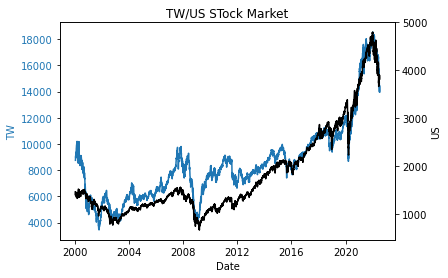

In [3]:
start_date = '2000-01-01'
end_date = '2022-07-12'
SP500 = pdr.data.DataReader('^GSPC', 'yahoo', start=start_date, end=end_date)
TW0050 = pdr.data.DataReader('^TWII', 'yahoo', start=start_date, end=end_date)
fig, ax1 = plt.subplots()
plt.title('TW/US STock Market')
plt.xlabel('Date')
ax2 = ax1.twinx()
ax1.set_ylabel('TW', color='tab:blue')
ax1.plot(TW0050.Close, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylabel('US', color='black')
ax2.plot(SP500.Close, color='black')
ax2.tick_params(axis='y', labelcolor='black')
print(TW0050.Close.corr(SP500.Close))
print(TW0050.pct_change().Close.corr(SP500.pct_change().Close))

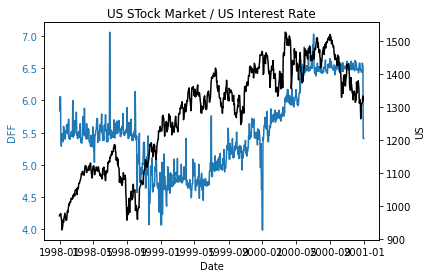

In [4]:
start_date = '1998-01-01'
end_date = '2000-12-31'
SP500 = pdr.data.DataReader('^GSPC', 'yahoo', start=start_date, end=end_date)
DFF = pdr.data.DataReader('DFF', 'fred', start=start_date, end=end_date)
fig, ax1 = plt.subplots()
plt.title('US STock Market / US Interest Rate')
plt.xlabel('Date')
ax2 = ax1.twinx()
ax1.set_ylabel('DFF', color='tab:blue')
ax1.plot(DFF, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylabel('US', color='black')
ax2.plot(SP500.Close, color='black')
ax2.tick_params(axis='y', labelcolor='black')

In [5]:
start_date = '2002-10-18'
end_date = '2022-07-22'
TW2412 = pdr.data.DataReader('2412.TW', 'yahoo', start=start_date, end=end_date)
TW0050 = pd.read_csv('./台灣指數資料.csv')

In [6]:
TW2412

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-10-18,50.897316,50.248940,50.789249,50.897316,1807343.0,16.284483
2002-10-21,50.681194,49.816700,50.681194,49.816700,1045926.0,15.938745
2002-10-22,50.681194,49.708633,49.708633,50.573128,2569865.0,16.180758
2002-10-23,50.789249,49.708633,50.465061,50.789249,2473583.0,16.249907
2002-10-24,51.653744,50.573128,50.789249,51.545689,3365652.0,16.491928
...,...,...,...,...,...,...
2022-07-18,124.000000,122.000000,124.000000,123.000000,18343477.0,123.000000
2022-07-19,123.500000,120.500000,123.000000,121.500000,17131648.0,121.500000
2022-07-20,122.000000,120.000000,121.500000,120.000000,12111980.0,120.000000


In [7]:
TW0050['日期'] = pd.to_datetime(TW0050['日期'])
TW0050.rename(columns={'日期':'Date'}, inplace=True)
TW0050.set_index('Date', inplace=True)
TW0050

,TW50,TW50TR
Date,,
2002-10-18,3409.79,3448.13
2002-10-21,3400.68,3438.92
2002-10-22,3323.56,3360.93
2002-10-23,3496.82,3536.14
2002-10-24,3483.31,3523.98
...,...,...
2022-07-18,11364.54,23478.68
2022-07-19,11310.70,23367.45
2022-07-20,11364.57,23490.83


In [8]:
TW2412['Adj Close'][-1]/TW2412['Adj Close'][0] - 1, TW2412['Adj Close'].max()/TW2412['Adj Close'][0] - 1

(6.276865978531369, 6.86024341984823)

In [9]:
TW0050['TW50TR'][-1]/TW0050['TW50TR'][0] - 1, TW0050['TW50TR'].max()/TW0050['TW50TR'][0] - 1

(5.941869941098509, 7.6674922349215375)

In [13]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

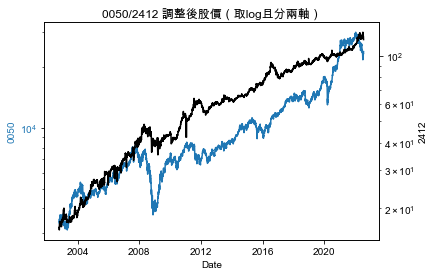

In [14]:
# 還原股價
fig, ax1 = plt.subplots()
plt.title('0050/2412 調整後股價（取log且分兩軸）')
plt.xlabel('Date')
plt.yscale('log')
ax2 = ax1.twinx()
ax1.set_ylabel('0050', color='tab:blue')
ax1.plot(TW0050['TW50TR'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.yscale('log')
ax2.set_ylabel('2412', color='black')
ax2.plot(TW2412['Adj Close'], color='black')
ax2.tick_params(axis='y', labelcolor='black')

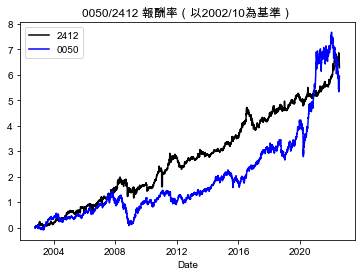

In [15]:
TW2412_relative_return = TW2412['Adj Close']/TW2412['Adj Close'][0] - 1
TW0050_relative_return = TW0050['TW50TR']/TW0050['TW50TR'][0] - 1

# 還原股價相對報酬
# fig, ax1 = plt.subplots()
plt.title('0050/2412 報酬率（以2002/10為基準）')
plt.xlabel('Date')
# ax2 = ax1.twinx()
# ax1.set_ylabel('0050', color='tab:blue')
# ax1.plot(TW0050_relative_return, color='tab:blue')
# ax1.tick_params(axis='y', labelcolor='tab:blue')
# ax2.set_ylabel('2412', color='black')
# ax2.plot(TW2412_relative_return, color='black')
# ax2.tick_params(axis='y', labelcolor='black')
plt.plot(TW2412_relative_return, color='black', label='2412')
plt.plot(TW0050_relative_return, color='blue', label='0050')
plt.legend(loc='best')
plt.show()